In [41]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [42]:
data = {
    'bank': "1dzL_SWBkBs5xrUxuGQTm04oe3USgkL9u",    # banking data
    'sales': "1QK-VgSU3AxXUw330KjYFUj8S9hzKJsG6",   # sales data
    'mcc': "1JN0bR84sgZ_o4wjKPBUmz45NeEEkVgt7",     # mcc description
}

In [43]:
for name, file_id in data.items():
    gdown.download(f'https://drive.google.com/uc?id={file_id}', name + '.parquet', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dzL_SWBkBs5xrUxuGQTm04oe3USgkL9u
To: C:\Users\Antonio Augusto\Documents\hackaton\BrasaHackaton\dataset\bank.parquet
100%|█████████████████████████████████████████████████████████████████████████████| 1.57M/1.57M [00:00<00:00, 4.99MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QK-VgSU3AxXUw330KjYFUj8S9hzKJsG6
To: C:\Users\Antonio Augusto\Documents\hackaton\BrasaHackaton\dataset\sales.parquet
100%|█████████████████████████████████████████████████████████████████████████████| 6.37M/6.37M [00:00<00:00, 6.39MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JN0bR84sgZ_o4wjKPBUmz45NeEEkVgt7
To: C:\Users\Antonio Augusto\Documents\hackaton\BrasaHackaton\dataset\mcc.parquet
100%|█████████████████████████████████████████████████████████████████████████████| 57.3k/57.3k [00:00<00:00, 1.10MB/s]


In [44]:
df = {}
for name in data.keys():
    df[name] = pd.read_parquet(name + '.parquet')

In [7]:
df['sales']

,document_id,date_time,value,card_number,type,mcc,state
0,9132021237731236867,2022-12-08 01:09:53.352600,240.00,,Pix,5499,RN
1,9132021237731236867,2022-12-04 03:04:08.115900,88.00,,Pix,5499,RN
2,9132021237731236867,2022-12-07 03:07:05.865600,76.00,,Pix,5499,RN
3,9132021237731236867,2022-12-05 02:45:01.539400,48.00,,Pix,5499,RN
4,9132021237731236867,2022-12-08 03:10:59.259900,8.00,,Pix,5499,RN
...,...,...,...,...,...,...,...
266965,1520813460744343295,2022-12-01 17:11:55.749500,319.80,1508673741982500096,Alimentação,5422,RS
266966,1520813460744343295,2023-05-17 02:06:09.048800,9.60,6001044247338530816,Alimentação,5422,RS
266967,1520813460744343295,2023-03-01 17:52:01.241600,309.40,,Alimentação,5422,RS
266968,1520813460744343295,2023-01-09 00:11:01.052900,887.32,3182228169760180736,Alimentação,5422,RS


In [8]:
df['bank']

,document_id,date_time,value,counterparty_document,type
0,5615027685943047372,2023-02-08 19:02:36.289545,400000.00,2701672467485454263,pix_in
1,6321206883189082161,2023-05-21 17:45:10.407340,330000.00,5674766186099233601,pix_in
2,6204525363384429949,2023-05-19 14:53:21.567099,200000.00,2193750750108086695,pix_out
3,6347736874608223396,2023-04-05 12:13:38.056087,200000.00,904790816053028747,pix_out
4,6347736874608223396,2023-04-07 23:44:04.727672,200000.00,904790816053028747,pix_out
...,...,...,...,...,...
66184,4176676849454697385,2023-01-17 12:27:44.012951,0.88,6015991367796145791,pix_in
66185,4176676849454697385,2022-12-23 16:38:35.784940,0.80,6015991367796145791,pix_out
66186,6367852746770439350,2023-01-09 05:49:23.584379,0.80,5566228780935135215,pix_in
66187,5952522905932206715,2022-12-21 22:14:41.099309,0.60,3467101161978958464,pix_in


In [9]:
unique_types = df['sales']['type'].unique()
print(unique_types)

['Pix' 'Débito' 'Voucher' 'Crédito' 'Benefícios' 'Alimentação' 'Refeição'
 'Flex']


In [10]:
filtered_bank_df = df['bank'][df['bank']['document_id'] != df['bank']['counterparty_document']]
filtered_bank_df = filtered_bank_df[filtered_bank_df['type'] != 'pix_out']
filtered_bank_df

,document_id,date_time,value,counterparty_document,type
0,5615027685943047372,2023-02-08 19:02:36.289545,400000.00,2701672467485454263,pix_in
1,6321206883189082161,2023-05-21 17:45:10.407340,330000.00,5674766186099233601,pix_in
6,5615027685943047372,2023-03-05 11:20:10.322203,200000.00,8222578902735271623,pix_in
7,5615027685943047372,2023-03-06 11:37:40.236905,200000.00,8222578902735271623,pix_in
9,5615027685943047372,2023-03-11 19:08:30.834887,160000.00,1675455838011611815,pix_in
...,...,...,...,...,...
66183,453832840298988785,2023-02-27 16:58:34.952689,1.00,7665343847314010680,pix_in
66184,4176676849454697385,2023-01-17 12:27:44.012951,0.88,6015991367796145791,pix_in
66186,6367852746770439350,2023-01-09 05:49:23.584379,0.80,5566228780935135215,pix_in
66187,5952522905932206715,2022-12-21 22:14:41.099309,0.60,3467101161978958464,pix_in


In [27]:
# Contar as ocorrências de cada document_id no DataFrame limpo
document_id_counts_clean = filtered_bank_df['document_id'].value_counts()

# Selecionar os 10 document_id mais frequentes
top_10_document_ids_clean = document_id_counts_clean.head(10)

# Exibir os 10 principais document_id
print("Top 10 document_ids mais frequentes (dados limpos):")
print(top_10_document_ids_clean)


Top 10 document_ids mais frequentes (dados limpos):
5232685348355818300    3079
8648043700133268622    2813
453832840298988785     2573
8196429325525125152    2242
5952522905932206715    2123
648260413505740527     2052
5304179800127950998    1708
6347736874608223396    1697
2659879820380034548    1412
1690472938955678638    1384
Name: document_id, dtype: int64


In [37]:
specific_transactions_clean = filtered_bank_df[filtered_bank_df['document_id'] == 5232685348355818300]

# Contar as ocorrências de cada counterparty_document no DataFrame limpo
counterparty_counts_clean = specific_transactions_clean['counterparty_document'].value_counts()

# Identificar o counterparty_document que mais enviou dinheiro
top_counterparty_clean = counterparty_counts_clean.idxmax()
top_count_clean = counterparty_counts_clean.max()

# Identificar os 10 principais counterparty_documents
top_10_counterparties_clean = counterparty_counts_clean.head(10)

# Exibir resultados
print(f'O counterparty_document que mais enviou dinheiro para o document_id 5232685348355818300 é: {top_counterparty_clean}')
print(f'O número de transações enviadas por esse counterparty_document é: {top_count_clean}')
print('\nTop 10 counterparty_documents que mais enviaram dinheiro:')
print(top_10_counterparties_clean)

O counterparty_document que mais enviou dinheiro para o document_id 5232685348355818300 é: 2623815588553627570
O número de transações enviadas por esse counterparty_document é: 69

Top 10 counterparty_documents que mais enviaram dinheiro:
2623815588553627570    69
5577323130042832923    50
6735275059972821037    47
1401639756815182210    44
7765274228624578663    39
3256058780867340350    35
5427810311093203643    34
7981176129973409707    33
1452562615712291622    30
2401047836230825690    29
Name: counterparty_document, dtype: int64


In [38]:
# Filtrar o DataFrame limpo para transações destinadas ao document_id específico
specific_transactions_clean = filtered_bank_df[filtered_bank_df['document_id'] == 5232685348355818300]

# Contar as ocorrências de cada counterparty_document no DataFrame limpo
counterparty_counts_clean = specific_transactions_clean['counterparty_document'].value_counts()

# Identificar os 10 principais counterparty_documents
top_10_counterparties_clean = counterparty_counts_clean.head(10).index

# Filtrar transações para os 10 clientes mais habituais
top_10_transactions_clean = specific_transactions_clean[specific_transactions_clean['counterparty_document'].isin(top_10_counterparties_clean)]

# Calcular o valor médio gasto por cada um dos 10 clientes
average_spent_per_customer_clean = top_10_transactions_clean.groupby('counterparty_document')['value'].mean()

# Ordenar os resultados pelo valor médio gasto (opcional)
average_spent_per_customer_clean = average_spent_per_customer_clean.sort_values(ascending=False)

# Exibir os resultados
print("Valor médio gasto pelos 10 clientes mais habituais no document_id 5232685348355818300:")
print(average_spent_per_customer_clean)


Valor médio gasto pelos 10 clientes mais habituais no document_id 5232685348355818300:
counterparty_document
2623815588553627570    694.518261
7981176129973409707    380.495758
1401639756815182210    196.727273
6735275059972821037    159.659574
7765274228624578663    104.717949
1452562615712291622     94.800000
2401047836230825690     86.482759
3256058780867340350     79.542857
5577323130042832923     71.520000
5427810311093203643     57.411765
Name: value, dtype: float64


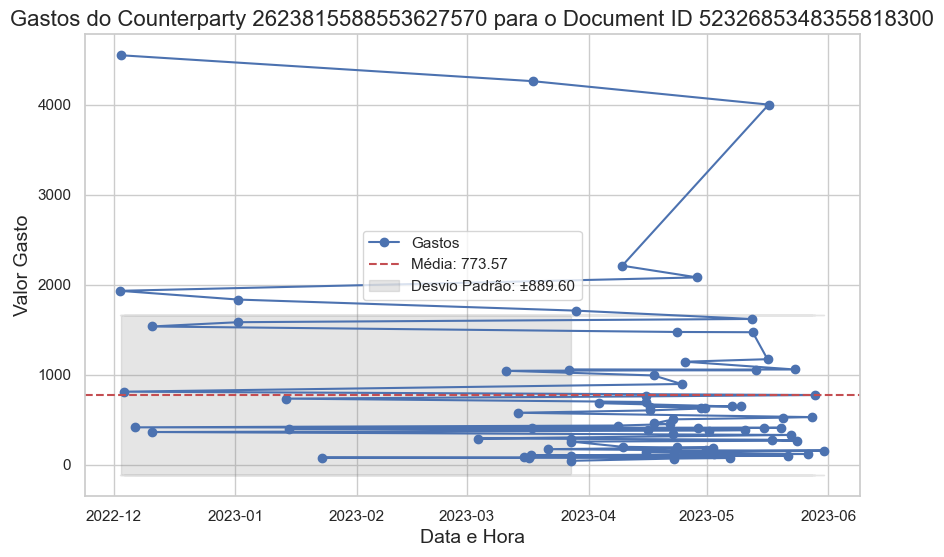

In [40]:
filtered_transactions = df['bank'][
    (df['bank']['document_id'] == 5232685348355818300) &
    (df['bank']['counterparty_document'] == 2623815588553627570)
]

# Calcular a média e o desvio padrão dos valores
mean_value = filtered_transactions['value'].mean()
std_dev_value = filtered_transactions['value'].std()

# Criar o gráfico dos valores
plt.figure(figsize=(10, 6))
plt.plot(filtered_transactions['date_time'], filtered_transactions['value'], marker='o', linestyle='-', label='Gastos')

# Adicionar linha da média
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Média: {mean_value:.2f}')

# Adicionar banda de desvio padrão (média ± desvio padrão)
plt.fill_between(filtered_transactions['date_time'], mean_value - std_dev_value, mean_value + std_dev_value, color='gray', alpha=0.2, label=f'Desvio Padrão: ±{std_dev_value:.2f}')

# Adicionar títulos e labels
plt.title('Gastos do Counterparty 2623815588553627570 para o Document ID 5232685348355818300', fontsize=16)
plt.xlabel('Data e Hora', fontsize=14)
plt.ylabel('Valor Gasto', fontsize=14)
plt.legend()

# Exibir o gráfico
plt.show()

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

filtered_transactions = filtered_bank_df[
    (filtered_bank_df['document_id'] == 453832840298988785) &
    (filtered_bank_df['counterparty_document'] == 3366605709254015352)
].copy()  # Use copy() para evitar o aviso de SettingWithCopyWarning

# Criar uma nova coluna com um identificador para cada transação
filtered_transactions.loc[:, 'transaction_id'] = np.arange(len(filtered_transactions))

# Verificar se há amostras suficientes
if len(filtered_transactions) > 1:
    # Criar variáveis independentes e dependentes
    X = filtered_transactions[['transaction_id']]
    y = filtered_transactions['value']

    # Dividir os dados em conjuntos de treinamento e teste
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Criar e treinar o modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
    print(f'Coeficiente de Determinação (R²): {r2:.2f}')

    # Visualizar os resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
    plt.xlabel('Identificador da Transação')
    plt.ylabel('Valor Enviado')
    plt.title('Regressão Linear para Previsão de Gastos')
    plt.legend()
    plt.show()
else:
    print("Não há amostras suficientes para dividir em conjuntos de treinamento e teste.")

Não há amostras suficientes para dividir em conjuntos de treinamento e teste.


In [77]:
df_sales = df['sales']

# Contar o número total de vendas por document_id
sales_count_by_document = df_sales.groupby('document_id').size().reset_index(name='sales_count')

# Encontrar os 5 document_id com mais vendas
top_5_documents = sales_count_by_document.sort_values(by='sales_count', ascending=False).head(10)

print(top_5_documents)

            document_id  sales_count
30  2789306792163911095         2999
35  3704910512407759019         2999
6    453832840298988785         2999
8    735181776246573491         2999
24  2277375648452898776         2999
76  7272948363556931019         2999
52  5304179800127950998         2999
99  9202060645083883366         2998
56  5576391638019864325         2998
92  8638600926820648527         2998


In [91]:
df_sales = df['sales']
document_id_to_analyze = '9132021237731236867'
df_filtered = df_sales[df_sales['document_id'] == 5576391638019864325].copy()
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])
df_filtered['hour'] = df_filtered['date_time'].dt.hour
sales_by_hour = df_filtered.groupby('hour').size().reset_index(name='sales_count')
least_sales_hour = sales_by_hour[sales_by_hour['sales_count'] == sales_by_hour['sales_count'].min()]
print(f"A(s) hora(s) com menos vendas para o document_id {document_id_to_analyze} é(são):")
print(least_sales_hour)

A(s) hora(s) com menos vendas para o document_id 9132021237731236867 é(são):
   hour  sales_count
3     4            5


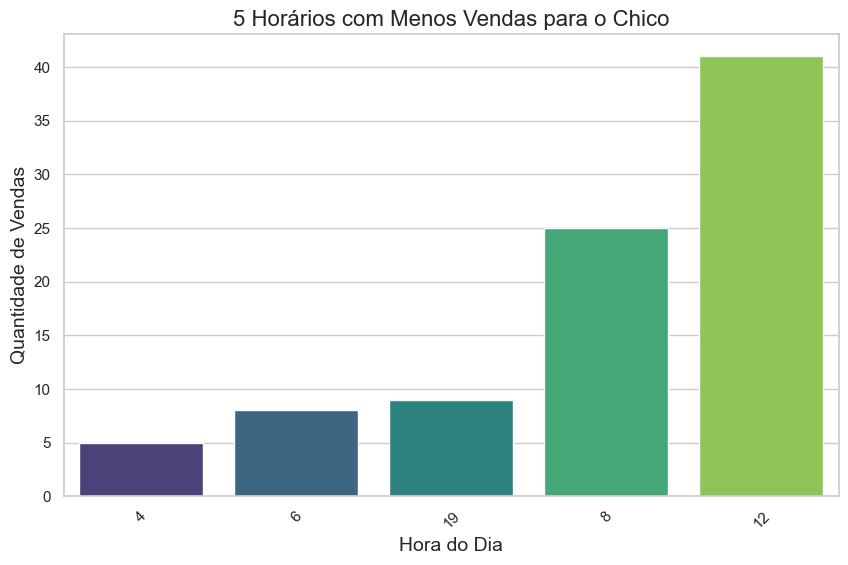

In [92]:
sales_by_hour = df_filtered.groupby('hour').size().reset_index(name='sales_count')
least_sales_hours = sales_by_hour.nsmallest(5, 'sales_count').sort_values('sales_count')

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='sales_count', data=least_sales_hours, palette='viridis', order=least_sales_hours['hour'])

# Configurações adicionais do gráfico
plt.title(f'5 Horários com Menos Vendas para o Chico', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Quantidade de Vendas', fontsize=14)
plt.xticks(rotation=45)
plt.show()

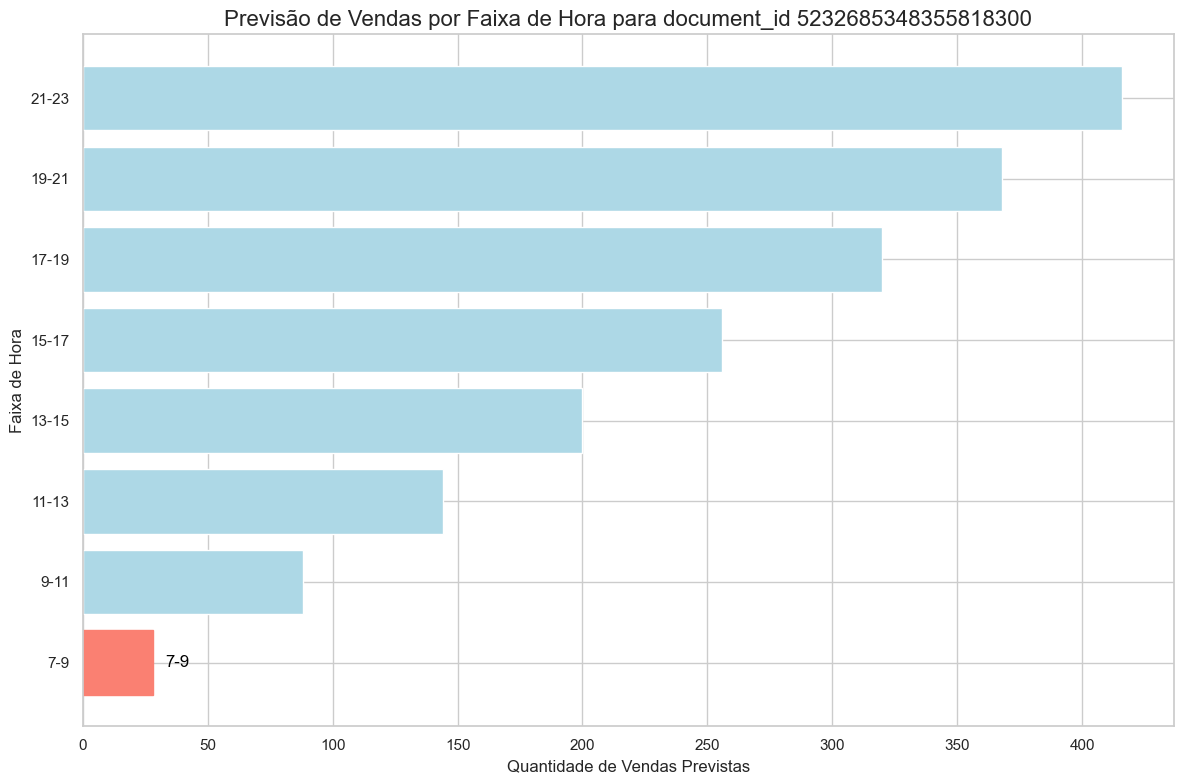

In [93]:
df_sales = df['sales']

# Definir o `document_id` que você deseja analisar
document_id_to_analyze = '5232685348355818300'

# Filtrar os dados para esse `document_id`
df_filtered = df_sales[df_sales['document_id'] == 5576391638019864325].copy()

# Converter a coluna `date_time` para datetime
df_filtered.loc[:, 'date_time'] = pd.to_datetime(df_filtered['date_time'])

# Extrair a hora da coluna `date_time`
df_filtered.loc[:, 'hour'] = df_filtered['date_time'].dt.hour

# Filtrar para o horário de funcionamento das 7h às 24h
df_filtered = df_filtered[(df_filtered['hour'] >= 7) & (df_filtered['hour'] < 24)]

# Contar o número de vendas em cada hora
sales_by_hour = df_filtered.groupby('hour').size().reset_index(name='sales_count')

# Criar faixas de 2 horas corretamente
bins = np.arange(7, 25, 2)  # De 7h até 24h
labels = [f'{i}-{i+2}' for i in bins[:-1]]  # Criar etiquetas para as faixas

# Atribuir cada hora a uma faixa
sales_by_hour['hour_bin'] = pd.cut(sales_by_hour['hour'], bins=bins, right=False, labels=labels)

# Agregar o número de vendas por faixa de 2 horas
sales_by_hour_bin = sales_by_hour.groupby('hour_bin')['sales_count'].sum().reset_index()

# Transformar a faixa de hora em variáveis numéricas para regressão
sales_by_hour_bin['hour_bin_start'] = sales_by_hour_bin['hour_bin'].apply(lambda x: int(x.split('-')[0]))
sales_by_hour_bin['hour_bin_end'] = sales_by_hour_bin['hour_bin'].apply(lambda x: int(x.split('-')[1]))

# Variáveis independentes e dependentes
X = sales_by_hour_bin[['hour_bin_start', 'hour_bin_end']]
y = sales_by_hour_bin['sales_count']

# Adicionar uma coluna de 1s para o intercepto
X = np.hstack([X, np.ones((X.shape[0], 1))])  # Adicionar coluna para o intercepto

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões para todas as faixas de 2 horas
sales_by_hour_bin['predicted_sales'] = model.predict(X)

# Encontrar a faixa de horas com a menor previsão de vendas
best_discount_hour_bin = sales_by_hour_bin.loc[sales_by_hour_bin['predicted_sales'].idxmin()]

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.barh(sales_by_hour_bin['hour_bin'], sales_by_hour_bin['predicted_sales'], color='lightblue')
plt.xlabel('Quantidade de Vendas Previstas')
plt.ylabel('Faixa de Hora')
plt.title(f'Previsão de Vendas por Faixa de Hora para document_id {document_id_to_analyze}', fontsize=16)

# Destacar a faixa com menor previsão de vendas
best_bin_idx = sales_by_hour_bin['predicted_sales'].idxmin()
bars[best_bin_idx].set_color('salmon')
plt.text(
    sales_by_hour_bin['predicted_sales'].iloc[best_bin_idx] + 5, 
    best_bin_idx, 
    f'{sales_by_hour_bin["hour_bin"].iloc[best_bin_idx]}', 
    va='center', 
    ha='left',
    fontsize=12,
    color='black'
)

plt.tight_layout()
plt.show()

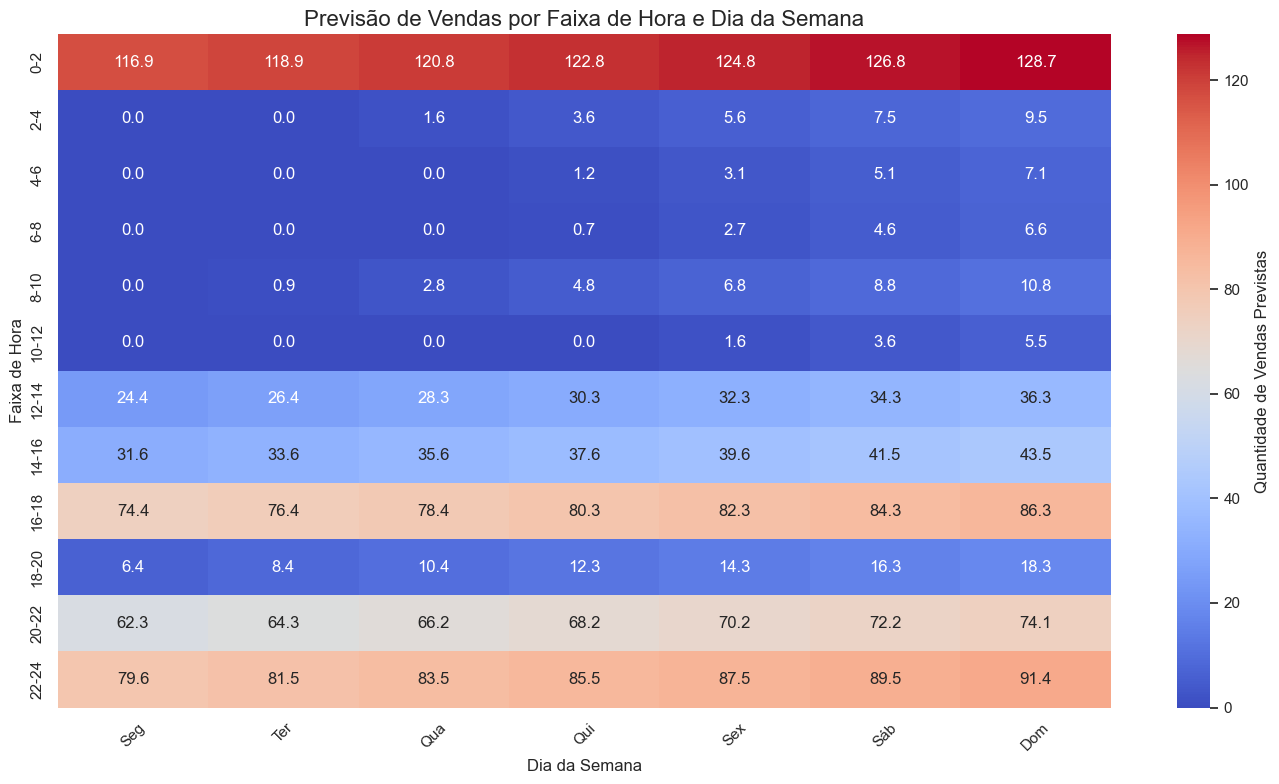

hour_bin           2-4
day_of_week          0
sales_count          4
predicted_sales    0.0
Name: 7, dtype: object

In [94]:
df_sales = df['sales']

# Definir o `document_id` que você deseja analisar
document_id_to_analyze = '5232685348355818300'

# Filtrar os dados para esse `document_id`
df_filtered = df_sales[df_sales['document_id'] == 5576391638019864325].copy()

# Verificar se há dados após o filtro
if df_filtered.empty:
    raise ValueError("O filtro para o `document_id` resultou em um DataFrame vazio. Verifique o `document_id` e os dados.")

# Converter a coluna `date_time` para datetime
df_filtered.loc[:, 'date_time'] = pd.to_datetime(df_filtered['date_time'])

# Extrair a hora e o dia da semana da coluna `date_time`
df_filtered.loc[:, 'hour'] = df_filtered['date_time'].dt.hour
df_filtered.loc[:, 'day_of_week'] = df_filtered['date_time'].dt.dayofweek  # 0=Segunda-feira, ..., 6=Domingo

# Contar o número de vendas em cada faixa de 2 horas por dia da semana
bins = np.arange(0, 25, 2)  # De 0h até 24h
labels = [f'{i}-{i+2}' for i in bins[:-1]]  # Criar etiquetas para as faixas

# Atribuir cada hora a uma faixa
df_filtered['hour_bin'] = pd.cut(df_filtered['hour'], bins=bins, right=False, labels=labels)

# Contar o número de vendas por faixa de 2 horas e dia da semana
sales_by_hour_day = df_filtered.groupby(['hour_bin', 'day_of_week']).size().reset_index(name='sales_count')

# Verificar se há dados suficientes para a regressão
if sales_by_hour_day.empty:
    raise ValueError("O agrupamento por faixa de hora e dia da semana resultou em um DataFrame vazio. Verifique os dados.")

# Criar variáveis para regressão
X = pd.get_dummies(sales_by_hour_day[['hour_bin', 'day_of_week']], drop_first=True)
y = sales_by_hour_day['sales_count']

# Garantir que há dados suficientes para a divisão de treino e teste
if len(X) < 2:
    raise ValueError("Não há amostras suficientes para dividir em conjuntos de treino e teste.")

# Adicionar uma coluna de 1s para o intercepto
X = np.hstack([X, np.ones((X.shape[0], 1))])  # Adicionar coluna para o intercepto

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões para todas as combinações de faixa de hora e dia da semana
sales_by_hour_day['predicted_sales'] = model.predict(X)

# Garantir que as previsões de vendas não sejam negativas
sales_by_hour_day['predicted_sales'] = sales_by_hour_day['predicted_sales'].clip(lower=0)

# Encontrar a combinação de faixa de hora e dia da semana com a menor previsão de vendas
best_discount_hour_day = sales_by_hour_day.loc[sales_by_hour_day['predicted_sales'].idxmin()]

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras para visualizar a previsão de vendas por faixa de hora e dia da semana
plt.figure(figsize=(14, 8))
heatmap_data = sales_by_hour_day.pivot('hour_bin', 'day_of_week', 'predicted_sales')
plt.title('Previsão de Vendas por Faixa de Hora e Dia da Semana', fontsize=16)
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Quantidade de Vendas Previstas'})
plt.xlabel('Dia da Semana')
plt.ylabel('Faixa de Hora')
plt.xticks(ticks=np.arange(7) + 0.5, labels=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'], rotation=45)
plt.tight_layout()
plt.show()

# Mostrar a faixa de hora e dia com a menor previsão de vendas
best_discount_hour_day

In [25]:
df['sales']

,document_id,date_time,value,card_number,type,mcc,state
0,9132021237731236867,2022-12-08 01:09:53.352600,240.00,,Pix,5499,RN
1,9132021237731236867,2022-12-04 03:04:08.115900,88.00,,Pix,5499,RN
2,9132021237731236867,2022-12-07 03:07:05.865600,76.00,,Pix,5499,RN
3,9132021237731236867,2022-12-05 02:45:01.539400,48.00,,Pix,5499,RN
4,9132021237731236867,2022-12-08 03:10:59.259900,8.00,,Pix,5499,RN
...,...,...,...,...,...,...,...
266965,1520813460744343295,2022-12-01 17:11:55.749500,319.80,1508673741982500096,Alimentação,5422,RS
266966,1520813460744343295,2023-05-17 02:06:09.048800,9.60,6001044247338530816,Alimentação,5422,RS
266967,1520813460744343295,2023-03-01 17:52:01.241600,309.40,,Alimentação,5422,RS
266968,1520813460744343295,2023-01-09 00:11:01.052900,887.32,3182228169760180736,Alimentação,5422,RS


In [9]:
# Agrupar por counterparty_document e calcular a média da coluna value
mean_values = df.groupby('counterparty_document')['value'].mean()

# Exibir o resultado
print(mean_values)


counterparty_document
27150544088378          48.0
345020050117820        316.0
857911140918458         20.0
982180126068621         24.0
1484487824357073        16.0
                       ...  
9222230785374978155    128.0
9222852372408945237    115.0
9222894982097696200    400.0
9223165685087753940     37.2
9223313739566494973    144.0
Name: value, Length: 25504, dtype: float64


In [10]:
import pandas as pd

# Carregar o DataFrame do arquivo Parquet (ou CSV, se for o caso)
sales_df = pd.read_parquet('sales.parquet')

# Exibir as primeiras linhas para verificar o conteúdo
print(sales_df.head())


           document_id                  date_time  value card_number type  \
0  9132021237731236867 2022-12-08 01:09:53.352600  240.0              Pix   
1  9132021237731236867 2022-12-04 03:04:08.115900   88.0              Pix   
2  9132021237731236867 2022-12-07 03:07:05.865600   76.0              Pix   
3  9132021237731236867 2022-12-05 02:45:01.539400   48.0              Pix   
4  9132021237731236867 2022-12-08 03:10:59.259900    8.0              Pix   

    mcc state  
0  5499    RN  
1  5499    RN  
2  5499    RN  
3  5499    RN  
4  5499    RN  


In [11]:
# Converter a coluna date_time para datetime
sales_df['date_time'] = pd.to_datetime(sales_df['date_time'])


In [12]:
# Definir uma função para encontrar o intervalo com o menor número de transações maior que 0
def find_min_transactions_interval(df):
    # Resample para criar intervalos de 1 dia
    daily_counts = df.resample('d', on='date_time').size()

    # Filtrar intervalos com contagem maior que 0
    daily_counts = daily_counts[daily_counts > 0]

    # Verificar se há intervalos com contagens maiores que 0
    if daily_counts.empty:
        return None, 0

    # Encontrar o intervalo com o menor número de transações
    min_interval = daily_counts.idxmin()
    min_count = daily_counts.min()

    return min_interval, min_count

# Configurar o DataFrame para cada mcc e aplicar a função
results = []
for mcc, group in sales_df.groupby('mcc'):
    min_interval, min_count = find_min_transactions_interval(group)
    if min_interval is not None:
        results.append({'mcc': mcc, 'min_interval_start': min_interval, 'transaction_count': min_count})

# Criar um DataFrame com os resultados
result_df = pd.DataFrame(results)

# Exibir o resultado
print(result_df)


     mcc min_interval_start  transaction_count
0   4812         2022-12-29                  7
1   5199         2023-05-20                  2
2   5211         2023-01-21                 11
3   5251         2023-03-04                  6
4   5311         2022-12-26                  1
5   5411         2023-05-31                 12
6   5422         2023-05-31                  8
7   5441         2023-03-09                  1
8   5462         2022-12-16                  1
9   5499         2023-05-31                 62
10  5571         2023-03-07                  1
11  5631         2022-12-23                  1
12  5651         2023-01-19                  2
13  5699         2022-12-05                  1
14  5734         2023-01-12                  1
15  5812         2023-05-31                 29
16  5813         2022-12-06                  1
17  5814         2023-01-07                 75
18  5912         2023-05-18                  2
19  5921         2023-02-26                 12
20  5947     